<img src='./pic/sharif-main-logo.png' alt="SUT logo" width=300 height=300 align=left class="saturate" > <br>

<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024 <br>
<font color=3C99D size=5>
    Practical Assignment 1 - Supervised Learning <br>
<font color=696880 size=4>
    Erfan Salima, Nikan Vasei, Romina Shiri, Sarina Heshmati

____

# Libraries

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Polynomial Regression & Bias-Variance Tradeoff (100 Points)

<font size=4>
Author: Nikan Vasei

## Introduction
In this part, we will explore the **bias-variance tradeoff** using polynomial regression models. Polynomial regression allows us to model complex relationships between an independent variable $X$ and a dependent variable $y$ by introducing higher-degree polynomial terms. However, increasing the complexity of the model can lead to **overfitting** or **underfitting**, which are key concepts in the bias-variance tradeoff.

## Plan
1. **Create a synthetic dataset**: Use the provided quadratic function to generate $X$ and $y$ with noise.
2. **Split the dataset**: Divide the data into training and test sets to evaluate model generalization.
3. **Train polynomial models**: Fit polynomial regression models with degrees ranging from 1 to 10 (or more).
4. **Evaluate performance**: Calculate the MSE for both training and test sets and compare the errors for different polynomial degrees.
5. **Analyze the results**: Use plots to visualize how the error on the training and test sets changes as the model complexity increases.

## Objective
The objective is to determine the degree of the polynomial that best models the relationship between $X$ and $y$ and balances both underfitting and overfitting, i.e., the degree that achieves the best generalization.

## 1. Create a synthetic dataset (15 Points)

Your first task is to define a function that generates a dataset with 1000 samples. The input values for the independent variable $X$ should be randomly selected within the range of **-3 to 3**. To make the dataset more realistic, add noise to the output using a normal distribution with a mean of 0 and a standard deviation of 10.

The relationship between the independent variable $X$ and the dependent variable $y$ is modeled by the following equation:

$$
y = 0.2X^6 - 0.5X^5 + 2X^4 - 5X^3 + 3X^2 - 10X + 5 + \text{noise}
$$

In [3]:
def generate_dataset(range_start, range_end, num_samples=1000, noise_std=10.0):
    # TODO: Generate dataset
    X = np.random.uniform(range_start, range_end, num_samples)
    noise = np.random.normal(0, noise_std, num_samples)
    y = 0.2 * X**6 - 0.5 * X**5 + 2 * X**4 - 5 * X**3 + 3 * X**2 - 10 * X + 5 + noise
    
    return X, y

Use a scatter plot to visualize the relationship between $X$ and $y$. This will help you understand the structure of the generated data before moving on to fitting models.

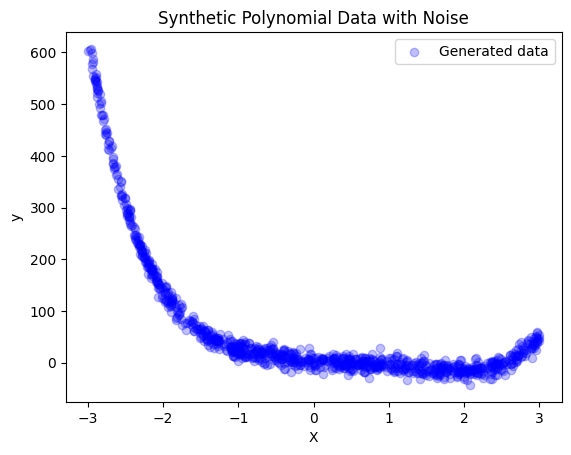

In [4]:
X, y = generate_dataset(-3, 3)

# TODO: Visualize the dataset using scatter (or other plots)
plt.scatter(X, y, color='b', alpha=0.25, label='Generated data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Polynomial Data with Noise')
plt.legend()
plt.show()

## 2. Splitting the Dataset (5 Points)

In this task, you should split the dataset into three parts:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

Ensure that the two test sets (In-Range and Out-of-Range) have the same length. You can use the `train_test_split` function from the `sklearn` library for convenience in splitting the data.

In [5]:
# TODO: Split dataset into the training and the in-range testing sets
X_train, X_test_in_range, y_train, y_test_in_range = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Generate the out-of-range testing set
X_out, y_out = generate_dataset(5, 7)
_, X_test_out_of_range, _, y_test_out_of_range = train_test_split(X_out, y_out, test_size=0.2, random_state=42)

Again, you can use a scatter plot (or similar plots) to visualize the different sets and see their overall distributions.

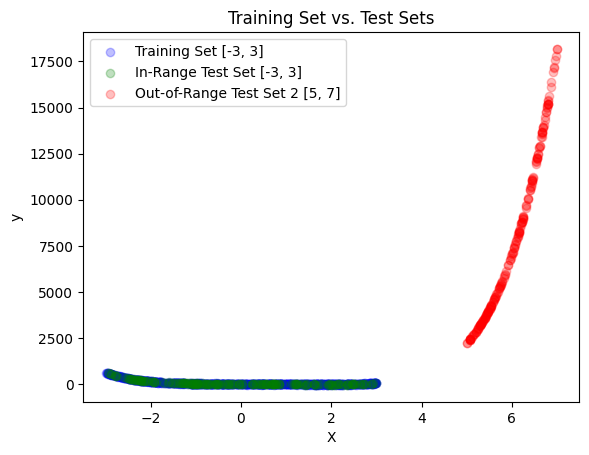

In [6]:
# TODO: Visualize the sets using scatter (or other plots)
plt.scatter(X_train, y_train, color='blue', alpha=0.25, label='Training Set [-3, 3]')
plt.scatter(X_test_in_range, y_test_in_range, color='green', alpha=0.25, label='In-Range Test Set [-3, 3]')
plt.scatter(X_test_out_of_range, y_test_out_of_range, color='red', alpha=0.25, label='Out-of-Range Test Set 2 [5, 7]')
plt.legend()
plt.title('Training Set vs. Test Sets')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## 3. Polynomial Regression Training (25 Points)

In this task, you should train polynomial regression models with varying degrees, ranging from degree = 2 to degree = 9. You can use the `preprocessing`, `linear_model`, and `pipeline` classes from the `sklearn` library to create and evaluate these models.

In [7]:
def train_models(X, y, degree):
    # TODO: Create and train a model based on the given degree
    features = PolynomialFeatures(degree=degree)
    lr = LinearRegression()
    
    model = make_pipeline(features, lr)    
    model.fit(X.reshape(-1, 1), y)
    
    return model

In [8]:
models = {}
degree = 9

# TODO: Add the trained models with different degrees to the dict
for d in range(2, degree + 1):
    models[d] = train_models(X_train, y_train, d)

## 4. Model Evaluation (20 Points)

In this task, you should evaluate the polynomial regression models on both test sets (In-Range Test Set and Out-of-Range Test Set) using Mean Squared Error (MSE). This evaluation will help you understand how well each model generalizes to different data ranges.

For each polynomial degree, compute the MSE on both the in-range test set and the out-of-range test set using the `mean_squared_error` function from the `sklearn` library.

In [9]:
def evaluate_models(models, X_test, y_test):
    losses = {}
    # TODO: Calculate MSE of each model (on the input test set).
    for degree, model in models.items():
        y_pred = model.predict(X_test.reshape(-1, 1))
        losses[degree] = mean_squared_error(y_test, y_pred)
    
    return losses

In [10]:
# TODO: Evaluate models on both the train and the test sets.
losses_train = evaluate_models(models, X_train, y_train)
losses_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
losses_out_of_range = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)

## 5. Analyzing Model Scores (20 Points)

In this task, you will visualize and analyze the performance of polynomial regression models by plotting the **logarithm** (to better visualize differences) of losses (Mean Squared Error, MSE) for both training and test set and also by printing the losses related to each degree.

Make sure to train each model a few times to get a sense of variability in the results.

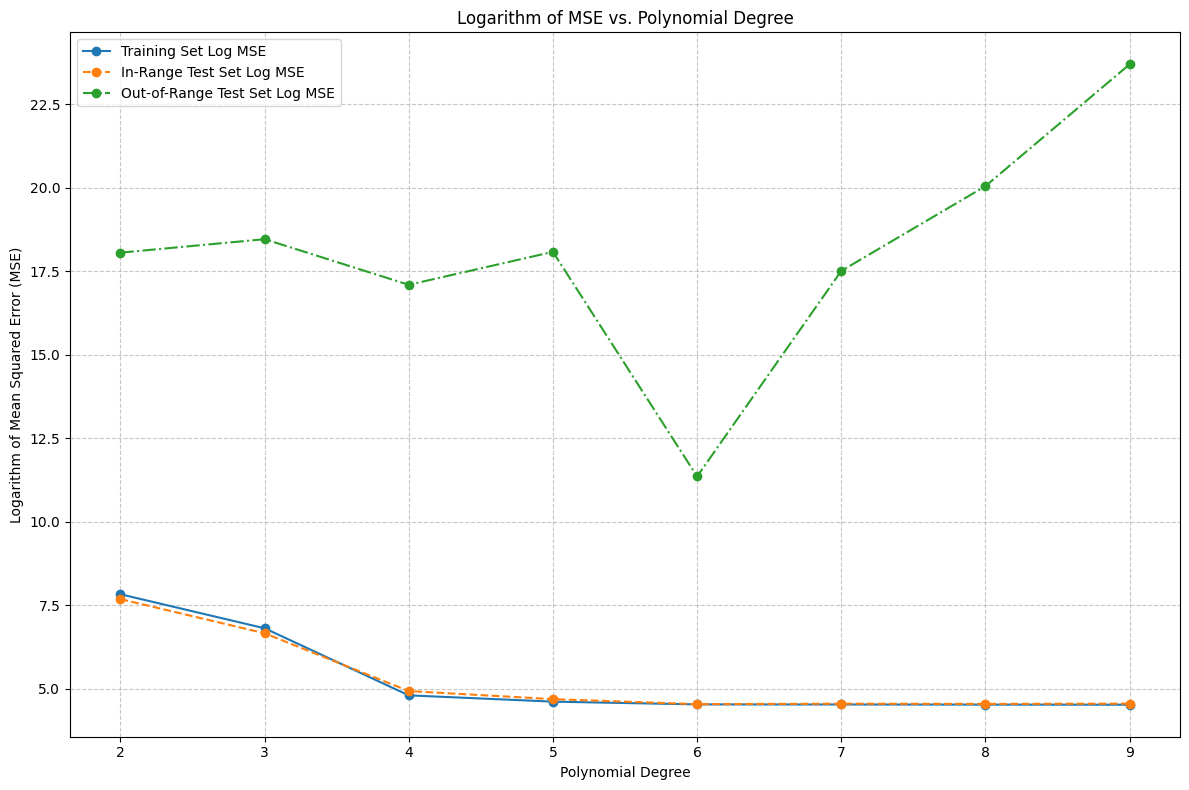

In [11]:
# TODO: Calculate the log MSE for both the train and the test sets based on the model degrees from 2 to 9
log_losses_train = np.log1p(list(losses_train.values()))
log_losses_in_range = np.log1p(list(losses_in_range.values()))
log_losses_out_of_range = np.log1p(list(losses_out_of_range.values()))

degrees = range(2, degree + 1)

# TODO: Plot the log MSE results
plt.figure(figsize=(12, 8))
plt.plot(degrees, list(log_losses_train), marker='o', linestyle='-', label='Training Set Log MSE')
plt.plot(degrees, list(log_losses_in_range), marker='o', linestyle='--', label='In-Range Test Set Log MSE')
plt.plot(degrees, list(log_losses_out_of_range), marker='o', linestyle='-.', label='Out-of-Range Test Set Log MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Logarithm of Mean Squared Error (MSE)')
plt.title('Logarithm of MSE vs. Polynomial Degree')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(degrees)
plt.tight_layout()
plt.show()

In [12]:
# TODO: Print each model loss on the training and the two test sets
print(f"{'Degree':<10}{'Train MSE':<20}{'In-Range Test MSE':<20}{'Out-of-Range Test MSE':<20}")
for i in range(degree - 1):
    print(f"{i + 2:<10}{log_losses_train[i]:<20.2f}{log_losses_in_range[i]:<20.2f}{log_losses_out_of_range[i]:<20.2f}")

Degree    Train MSE           In-Range Test MSE   Out-of-Range Test MSE
2         7.83                7.68                18.05               
3         6.81                6.66                18.46               
4         4.80                4.93                17.09               
5         4.61                4.69                18.08               
6         4.53                4.54                11.35               
7         4.53                4.55                17.50               
8         4.53                4.55                20.04               
9         4.52                4.55                23.69               


## Conclusion (15 Points)

1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

- <span style="color:cyan;">**Answer:** As the polynomial degree increases, the model tends to overfit the training data, leading to lower training loss but higher test loss, especially in the out-of-range test set. This demonstrates the bias-variance tradeoff: lower bias (better training fit) results in higher variance (poor generalization to unseen data). The challenge is finding a balance where the model performs well on both the training and test sets.

</span>

2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?

- <span style="color:cyan;">**Answer:** With increasing complexity (higher-degree polynomials), models tend to capture noise in the training data, resulting in overfitting. The in-range test set may still show reasonable performance, but the out-of-range test set performance drops significantly. This highlights that overly complex models generalize poorly, while simpler models can underfit. The best degree is one that balances complexity, fitting well without overfitting.

</span>

# Regularization (50 Points)

<font size=4>
Author: Romina Shiri

<font color=FF0000>
Will be merged.